In [1]:
import torch

# Linear Quantization

We will use below formula to calcluate quantized tensor

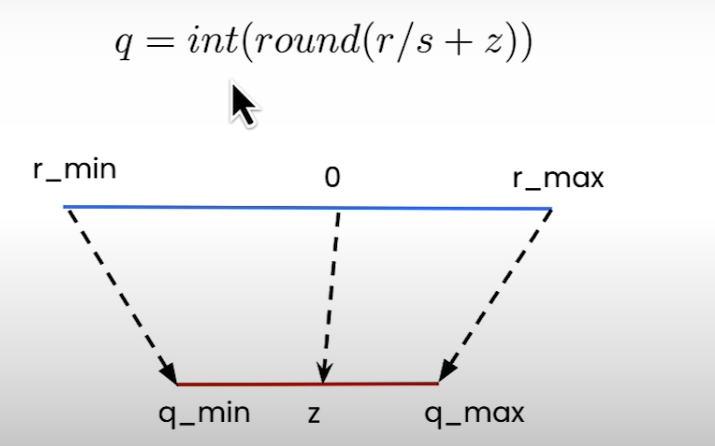

In [3]:
def linear_q_with_scale_and_zero_point(
    tensor, scale, zero_point, dtype = torch.int8):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(q_min,q_max).to(dtype)
    
    return q_tensor

In [4]:
### a dummy tensor to test the implementation
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [6]:
### these are random values for "scale" and "zero_point"
### to test the implementation
scale = 3.5
zero_point = -70

In [7]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, scale, zero_point)
quantized_tensor

tensor([[ -15,  -74,  127],
        [ -44,   14, -123],
        [ -70,  126,    0]], dtype=torch.int8)

# Linear Dequantization

we will below formulat for dequantization


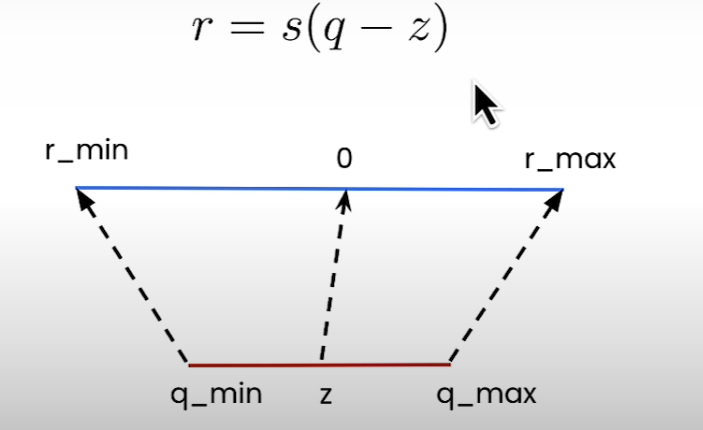

In [9]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [10]:
# this was the original tensor
# [[191.6, -13.5, 728.6],
#  [92.14, 295.5,  -184],
#  [0,     684.6, 245.5]]

In [11]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

In [13]:
### without casting to float - we noticed it deviates from original with big difference
scale * (quantized_tensor - zero_point)

tensor([[ 192.5000,  -14.0000, -206.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000, -210.0000,  245.0000]])

In [ ]:
# Modularize dequantization with function

In [14]:
def linear_dequantization(quantized_tensor, scale, zero_point):
    return scale * (quantized_tensor.float() - zero_point)

In [15]:
dequantized_tensor = linear_dequantization(
    quantized_tensor, scale, zero_point)

In [16]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

# Quantization Error

In [19]:
from helper import plot_quantization_errors

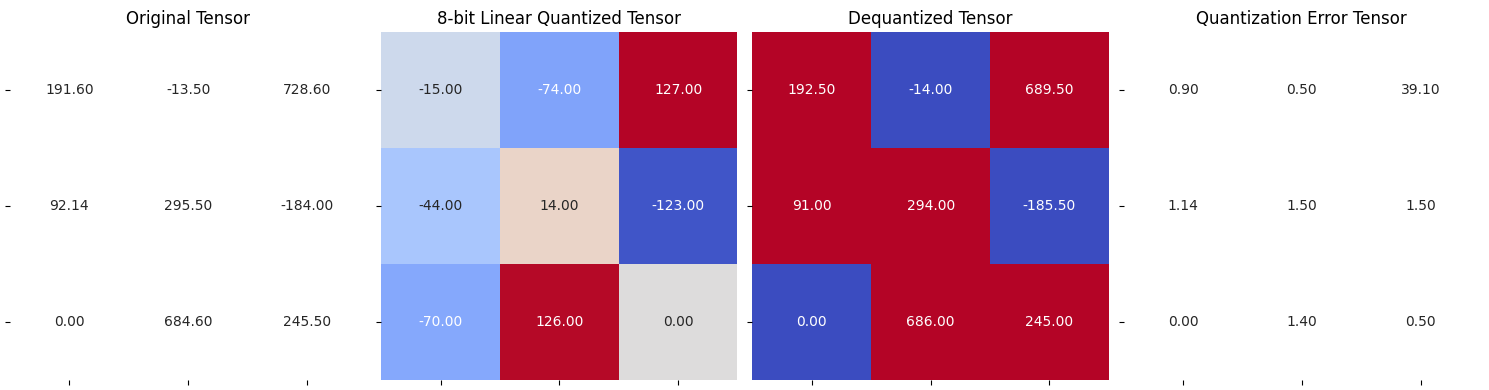

In [20]:
plot_quantization_errors(test_tensor, quantized_tensor,
                         dequantized_tensor)

Note: For the plot above, Quantization Error Tensor = abs(Original Tensor - Dequantized Tensor)

## Calculate an "overall" quantization error by using Mean Squared Error technique.

In [21]:
(dequantized_tensor - test_tensor).square().mean()

tensor(170.8753)